In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [6]:
def cohens(x, y):
    r"""Effect size metric through Cohen's *d* metric
    :param x: first vector
    :param y: second vector
    :return: absolute effect size value
    The Cohen's effect size *d* is defined as the difference
    between two means divided by a standard deviation of the data.
    .. math::
        d = \frac{\bar{x}_1 - \bar{x}_2}{s}
    For two independent samples, the *pooled standard deviation* is used
    instead, which is defined as:
    .. math::
        s = \sqrt{  \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2} }
    A Cohen's *d* is frequently used in estimating sample sizes for
    statistical testing: a lower *d* value indicates the necessity of
    larger sample sizes, and vice versa.
    .. note:: we return the absolute value
    :references: https://en.wikipedia.org/wiki/Effect_size
    """
    x = np.array(x)
    y = np.array(y)

    Nx = len(x) - 1.  # note the dot to cast to float
    Ny = len(y) - 1.
    # mean difference:
    md = np.abs(x.mean() - y.mean())
    # here, we want same as in R that is unbiased variance
    # so we use ddof = 1
    xv = x.var(ddof=1)
    yv = y.var(ddof=1)
    csd = Nx * xv + Ny * yv
    csd /= Nx + Ny  # make sure this is float
    csd = np.sqrt(csd)

    return md / csd

In [2]:
df = pd.read_csv('/Users/bamudamaris/ownCloud2/labs/datasets/gfp_measurement/normalised_gfp_all_clones.tsv', sep = '\t', index_col = 0)
df = df[df.index >= 400]
df.head(5)

,cadB-ctrl,cadB-test,mhpR-ctrl,mhpR-test,pdeL-ctrl,pdeL-test,waaQ-ctrl,waaQ-test,xapR-ctrl,xapR-test,...,yaeL-ctrl,yaeL-test,yeeD-ctrl,yeeD-test,yfdQ-ctrl,yfdQ-test,yfgJ-ctrl,yfgJ-test,yqiD-ctrl,yqiD-test
Time,,,,,,,,,,,,,,,,,,,,,
420,19285.945073,45041.916168,5914.209115,3137.457045,4477.272727,6182.978723,12015.384615,6134.057971,5232.142857,3704.697987,...,4723.076923,4135.593220,4933.333333,4147.058824,3186.274510,3844.155844,2670.103093,2531.531532,1790.123457,17276.315789
450,23112.033195,44819.354839,6148.387097,3282.913165,4152.439024,5788.395904,11250.000000,6020.710059,4982.758621,3681.198910,...,5415.584416,4600.000000,5146.666667,4050.632911,3380.165289,3923.913043,2210.526316,2223.880597,2010.309278,18205.555556
480,26069.575472,44669.367909,5896.272285,3122.844828,3983.213429,5543.535620,11198.198198,5695.652174,5097.560976,3573.593074,...,5062.500000,4792.682927,5472.527473,3842.105263,3212.328767,3071.428571,2166.666667,2296.296296,1672.413793,18140.271493
510,28071.500504,43626.444159,5523.696682,2897.476341,3413.602941,5150.197628,10192.371476,5272.251309,4698.275862,3503.496503,...,5780.701754,5793.814433,5192.982456,4203.539823,3655.172414,3107.142857,2150.537634,2307.317073,3000.000000,18301.470588
540,29245.315162,42127.771911,5291.311755,2680.572110,3156.918688,4651.094891,9427.148194,4752.355316,4390.243902,3151.988636,...,5137.931034,5114.035088,4833.333333,3342.857143,2925.925926,2775.862069,1563.265306,1778.625954,1719.298246,17730.994152


Compute effect size using chone's test
Small effect size: d = 0.2
Medium effect size: d = 0.5
Large effect size: d = 0.8

In [7]:
groups = set([c.split('-')[0] for c in df.columns])

results = []

# Loop through each pair of columns to compute the effect size
for gene in groups:
    ctrl_col = f'{gene}-ctrl'
    test_col = f'{gene}-test'
    effect_size = cohens(df[ctrl_col], df[test_col])
    results.append({'Gene_promoter': gene, 'effect_size': effect_size})

# Create a new DataFrame with the results
result_df = pd.DataFrame(results) 
#result_df.to_csv('/Users/bamudamaris/ownCloud2/labs/datasets/cohens.tsv', sep = '\t', index = False)
result_df

,Gene_promoter,effect_size
0,pdeL,1.715919
1,cadB,2.036431
2,yfdQ,0.740008
3,kgpT,5.346321
4,xapR,2.654982
5,ghoS,0.942187
6,yeeD,1.010678
7,waaQ,3.644323
8,yfgJ,0.351790
9,yhaV,6.137830


In [8]:
result_df.describe()

,effect_size
count,18.000000
mean,3.334509
std,3.798130
min,0.017524
25%,0.787217
50%,1.818686
75%,4.920822
max,12.833815


In [14]:

# Effect size classifications
small_effect = result_df[result_df['effect_size'] <= 0.2].shape[0]
medium_effect = result_df[(result_df['effect_size'] > 0.2) & (result_df['effect_size'] < 0.8)].shape[0]
large_effect = result_df[result_df['effect_size'] >= 0.8].shape[0]

print(f"Small effect (d ≤ 0.2): {small_effect} ({small_effect/count*100:.2f}%)")
print(f"Medium effect (0.2 < d < 0.8): {medium_effect} ({medium_effect/count*100:.2f}%)")
print(f"Large effect (d ≥ 0.8): {large_effect} ({large_effect/count*100:.2f}%)")


Small effect (d ≤ 0.2): 2 (11.11%)
Medium effect (0.2 < d < 0.8): 4 (22.22%)
Large effect (d ≥ 0.8): 12 (66.67%)


Compute fold enrichment for each test sample compared to its control

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import multitest

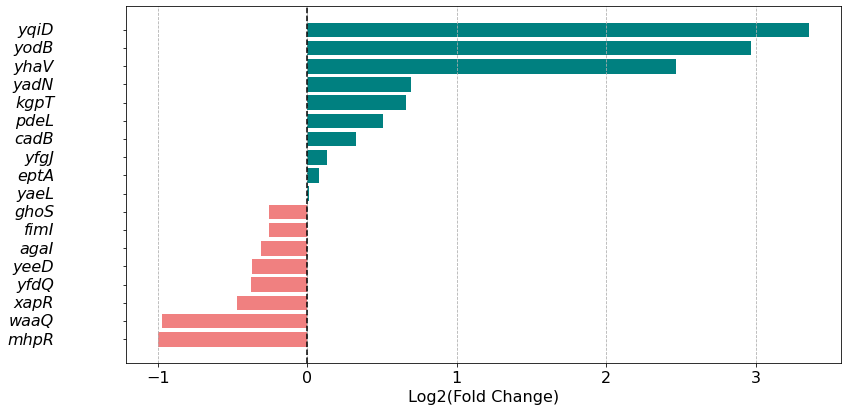

In [14]:
enrichment_results = {}

grouped_columns = {}
group_pairs = []

for column in df.columns:
    prefix = column.split('-')[0]
    if prefix not in grouped_columns:
        grouped_columns[prefix] = []
    grouped_columns[prefix].append(column)

for prefix, columns in grouped_columns.items():
    if len(columns) == 2:
        group_pairs.append((columns[0], columns[1]))


for group1, group2 in group_pairs:
    group1_values = df[group1].dropna()
    group2_values = df[group2].dropna()
    
    # Compute fold enrichment (mean of test values / mean of control values)
    fold_enrichment = group2_values.mean() / group1_values.mean()
    
    # Perform paired samples t-test
    t_stat, p_value = stats.ttest_rel(group1_values, group2_values)
    
    # Check if the enrichment is significant (p-value < 0.05)
    significant_enrichment = p_value < 0.05
    
    # Store fold enrichment and significance information
    enrichment_results[group2] = {'fold_enrichment': fold_enrichment, 'p_value': p_value, 'significant_enrichment': significant_enrichment}

# Extract gene names, fold enrichment values, and significance information
genes = list(enrichment_results.keys())
fold_enrichments = [result['fold_enrichment'] for result in enrichment_results.values()]
p_values = [result['p_value'] for result in enrichment_results.values()]
significant_enrichments = [result['significant_enrichment'] for result in enrichment_results.values()]

# Perform multiple testing correction for p-values (e.g., Benjamini-Hochberg procedure)
reject, p_adjusted, _, _ = multitest.multipletests(p_values, method='fdr_bh')

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'Gene': genes,
    'Fold_Enrichment': fold_enrichments,
    'P_Value': p_values,
    'Adjusted_P_Value': p_adjusted,
    'Significant_Enrichment': significant_enrichments
})



# Take log2 transformation of fold enrichment values
results_df['Log2_Fold_Enrichment'] = np.log2(results_df['Fold_Enrichment'])

# Sort the DataFrame by Log2_Fold_Enrichment
results_df = results_df.sort_values('Log2_Fold_Enrichment')

# Separate upregulated and downregulated genes
downregulated = results_df[results_df['Log2_Fold_Enrichment'] < 0]
upregulated = results_df[results_df['Log2_Fold_Enrichment'] >= 0]

# Combine sorted DataFrames
results_df_sorted = pd.concat([downregulated, upregulated])

# Define colors based on fold enrichment values
bar_colors = ['lightcoral' if fe < 0 else 'teal' for fe in results_df_sorted['Log2_Fold_Enrichment']]

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})
bar_positions = np.arange(len(results_df_sorted))
plt.barh(bar_positions, results_df_sorted['Log2_Fold_Enrichment'], color=bar_colors)

# Italicize y-axis labels
gene_names = results_df_sorted['Gene'].apply(lambda x: x.split('-')[0])
plt.yticks(bar_positions, [])  # Remove default labels
for i, gene in enumerate(gene_names):
    plt.text(-0.1, i, gene, ha='right', va='center', fontsize=16, fontstyle='italic', transform=plt.gca().get_yaxis_transform())

plt.xlabel('Log2(Fold Change)')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Add a vertical line at x=0 to separate up and down regulation
plt.axvline(x=0, color='black', linestyle='--')


#plt.savefig('/Users/bamudamaris/Library/CloudStorage/GoogleDrive-fufordamaris@gmail.com/My Drive/My Documents /PhD_project/thesis/figures/foldchange_sorted.svg', dpi=300)

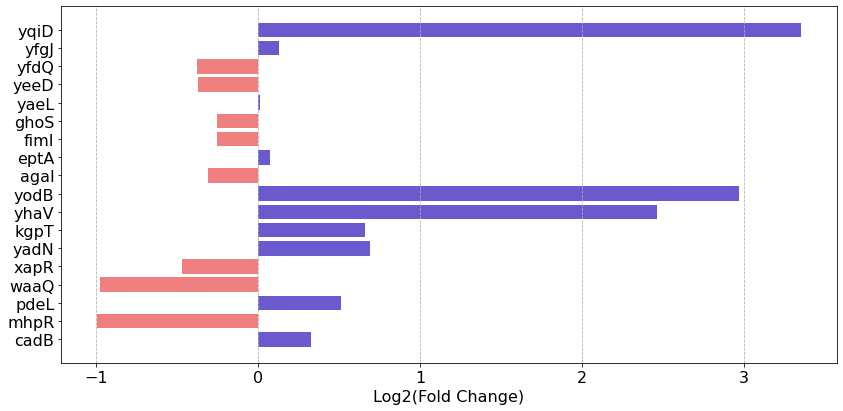

In [19]:
enrichment_results = {}

grouped_columns = {}
group_pairs = []

for column in df.columns:
    prefix = column.split('-')[0]
    if prefix not in grouped_columns:
        grouped_columns[prefix] = []
    grouped_columns[prefix].append(column)

for prefix, columns in grouped_columns.items():
    if len(columns) == 2:
        group_pairs.append((columns[0], columns[1]))


for group1, group2 in group_pairs:
    group1_values = df[group1].dropna()
    group2_values = df[group2].dropna()
    
    # Compute fold enrichment (mean of test values / mean of control values)
    fold_enrichment = group2_values.mean() / group1_values.mean()
    
    # Perform paired samples t-test
    t_stat, p_value = stats.ttest_rel(group1_values, group2_values)
    
    # Check if the enrichment is significant (p-value < 0.05)
    significant_enrichment = p_value < 0.05
    
    # Store fold enrichment and significance information
    enrichment_results[group2] = {'fold_enrichment': fold_enrichment, 'p_value': p_value, 'significant_enrichment': significant_enrichment}

# Extract gene names, fold enrichment values, and significance information
genes = list(enrichment_results.keys())
fold_enrichments = [result['fold_enrichment'] for result in enrichment_results.values()]
p_values = [result['p_value'] for result in enrichment_results.values()]
significant_enrichments = [result['significant_enrichment'] for result in enrichment_results.values()]

# Perform multiple testing correction for p-values (e.g., Benjamini-Hochberg procedure)
reject, p_adjusted, _, _ = multitest.multipletests(p_values, method='fdr_bh')

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'Gene': genes,
    'Fold_Enrichment': fold_enrichments,
    'P_Value': p_values,
    'Adjusted_P_Value': p_adjusted,
    'Significant_Enrichment': significant_enrichments
})

# Take log2 transformation of fold enrichment values
results_df['Log2_Fold_Enrichment'] = np.log2(results_df['Fold_Enrichment'])

# Define colors based on fold enrichment values
bar_colors = ['slateblue' if fe > 0 else 'lightcoral' for fe in results_df['Log2_Fold_Enrichment']]

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})
bar_positions = np.arange(len(results_df))

plt.barh(bar_positions, results_df['Log2_Fold_Enrichment'], color=bar_colors)
plt.yticks(bar_positions, results_df['Gene'].apply(lambda x: x.split('-')[0]))
plt.xlabel('Log2(Fold Change)')
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.savefig('/Users/bamudamaris/Library/CloudStorage/GoogleDrive-fufordamaris@gmail.com/My Drive/My Documents /PhD_project/thesis/figures/foldchange.svg', dpi = 300)

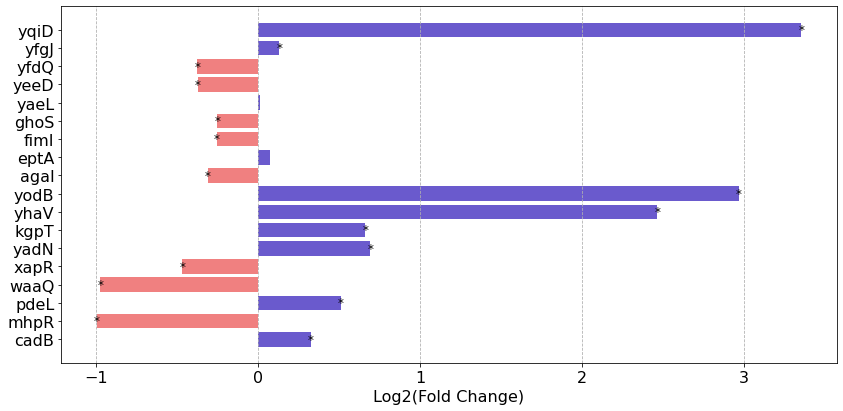

In [8]:
enrichment_results = {}

grouped_columns = {}
group_pairs = []

for column in df.columns:
    prefix = column.split('-')[0]
    if prefix not in grouped_columns:
        grouped_columns[prefix] = []
    grouped_columns[prefix].append(column)

for prefix, columns in grouped_columns.items():
    if len(columns) == 2:
        group_pairs.append((columns[0], columns[1]))


for group1, group2 in group_pairs:
    group1_values = df[group1].dropna()
    group2_values = df[group2].dropna()
    
    # Compute fold enrichment (mean of test values / mean of control values)
    fold_enrichment = group2_values.mean() / group1_values.mean()
    
    # Perform paired samples t-test
    t_stat, p_value = stats.ttest_rel(group1_values, group2_values)
    
    # Check if the enrichment is significant (p-value < 0.05)
    significant_enrichment = p_value < 0.05
    
    # Store fold enrichment and significance information
    enrichment_results[group2] = {'fold_enrichment': fold_enrichment, 'p_value': p_value, 'significant_enrichment': significant_enrichment}

# Extract gene names, fold enrichment values, and significance information
genes = list(enrichment_results.keys())
fold_enrichments = [result['fold_enrichment'] for result in enrichment_results.values()]
p_values = [result['p_value'] for result in enrichment_results.values()]
significant_enrichments = [result['significant_enrichment'] for result in enrichment_results.values()]

# Perform multiple testing correction for p-values (e.g., Benjamini-Hochberg procedure)
reject, p_adjusted, _, _ = multitest.multipletests(p_values, method='fdr_bh')

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'Gene': genes,
    'Fold_Enrichment': fold_enrichments,
    'P_Value': p_values,
    'Adjusted_P_Value': p_adjusted,
    'Significant_Enrichment': significant_enrichments
})

# Take log2 transformation of fold enrichment values
results_df['Log2_Fold_Enrichment'] = np.log2(results_df['Fold_Enrichment'])

# Define colors based on fold enrichment values
bar_colors = ['slateblue' if fe > 0 else 'lightcoral' for fe in results_df['Log2_Fold_Enrichment']]

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})
bar_positions = np.arange(len(results_df))

# Plot bars
bars = plt.barh(bar_positions, results_df['Log2_Fold_Enrichment'], color=bar_colors)

# Add asterisks for significant enrichments (adjusted p-value < 0.05)
for i, (sig, fe) in enumerate(zip(results_df['Adjusted_P_Value'] < 0.05, results_df['Log2_Fold_Enrichment'])):
    if sig:
        plt.text(fe, i, '*', ha='center', va='center', fontsize=12)

# Customize plot
plt.yticks(bar_positions, results_df['Gene'].apply(lambda x: x.split('-')[0]))
plt.xlabel('Log2(Fold Change)')
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
#plt.savefig('/Users/bamudamaris/ownCloud2/figures/fold_enrichment.svg', dpi = 300)

In [9]:
results_df.to_csv('/Users/bamudamaris/ownCloud2/labs/datasets/foldchange.tsv', sep = '\t', index = False)